<a href="https://colab.research.google.com/github/CosmasMandikonza/AGEIS/blob/main/Rlab_Confidence_intervals_NAME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundations for statistical inference - Confidence intervals
If you have access to data on an entire population, say the size of every house in Ames, Iowa, it’s straight forward to answer questions like, “How big is the typical house in Ames?” and “How much variation is there in sizes of houses?”. If you have access to only a sample of the population, as is often the case, the task becomes more complicated. What is your best guess for the typical size if you only know the sizes of several dozen houses? This sort of situation requires that you use your sample to make inference on what your population looks like.

In [ ]:
## Download Data

download.file("http://www.openintro.org/stat/data/ames.RData", destfile = "ames.RData")
load("ames.RData")



# Lab Instructions

I will be evalating both your code and your answers to questions below. All answers should be in a separate lab sheet, the template for which is provided with this assignment.  Please include a link to your lab in your lab sheet.  The following steps should help you get started with this assignment.

1) Download the lab sheet template and save it on your computer
2) Save a copy of this Colab Notebook on your own Drive (see File>Save a copy in Drive)
3) Rename your copy of the Colab Notebook
4) Copy a link to your Colab Notebook by going to Share
5) Paste a link to your Colab Notebook at the top of your lab sheet
6) Proceed with lab

# Introduction to Part 1
In this lab we’ll start with a simple random sample of size 60 from the population. Specifically, this is a simple random sample of size 60. Note that the data set has information on many housing variables, but for the first portion of the lab we’ll focus on the size of the house, represented by the variable Gr.Liv.Area.

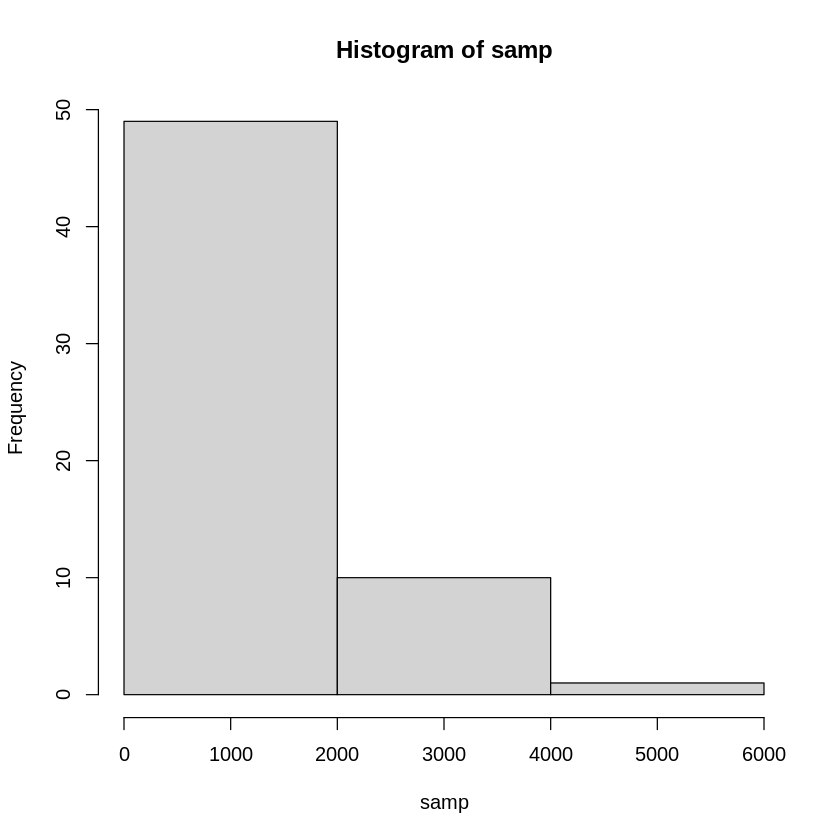

In [ ]:
# run the code below then edit as instructed to improve the graph
population <- ames$Gr.Liv.Area
samp <- sample(population, 60)
hist(samp, breaks = 3)

# R CODE TIP --> the parameter "breaks" in hist() limits the number of bins
# YOUR TASK --> Edit the breaks parameter to make a better histogram.
#               Use you judgement to pick a number of bins that best shows
#               the shape of the data.

# Part 1a: Sample Summary (complete following on you lab sheet)
1) Copy and paste the graph generated by your edited code into the lab sheet.


2) Answer the following questions:

Q1:  Describe the distribution of your sample by looking at the graph only. What would you say is the “typical” size within your sample?

Q2: Would you expect another student’s distribution to be identical to yours? Would you expect it to be similar? Why or why not?

In [ ]:
# Find the mean of your sample. This is your point estimate for the mean house size in Ames
sample_mean <- mean(samp)
print("sample mean")
sample_mean

[1] "sample mean"


[1] 1545.567

In [ ]:
# Use the following code to calculate a cofidence interval for your point estimate
se <- sd(samp) / sqrt(60)
lower <- sample_mean - 1.96 * se
upper <- sample_mean + 1.96 * se
c(lower, upper)

[1] 1365.200 1725.933

In [ ]:
# Find the mean of the population
print("population mean")
mean(population)

[1] "population mean"


[1] 1499.69

# Part 1b: Sample mean & C.I. (complete following on you lab sheet)
1) What is the mean and confidence interval for your point estimate?
2) How does the formula of confidence interval for a mean differ from the formula for the confidence interval of a proportion?
3) In what ways are the formulas for calculating a confidence interval for mean and proportion the same?
4) Does your confidence interval capture the true average size of houses in Ames?
5) Each student in class should have gotten a slightly different confidence interval. What proportion of those intervals would you expect to capture the true population mean? Why?

# Introduction to Part 2
Using R, we’re going to recreate many samples to learn more about how sample means and confidence intervals vary from one sample to another. Computer science stuctures called "Loops" come in handy.

Here is the rough outline:

1) Obtain a random sample.
2)  Calculate and store the sample’s mean and standard deviation.
3) Repeat steps (1) and (2) 50 times.
4) Use these stored statistics to calculate many confidence intervals.

But before we do all of this, we need to first create empty vectors where we can save the means and standard deviations that will be calculated from each sample. And while we’re at it, let’s also store the desired sample size as n.

In [ ]:
samp_mean <- rep(NA, 50)
samp_sd <- rep(NA, 50)
n <- 60

Now we’re ready for the loop where we calculate the means and standard deviations of 50 random samples and then calculate their confidence intervals.



In [ ]:
# Create a for-loop to generate simulated data

for(i in 1:50){
  samp <- sample(population, n) # obtain a sample of size n = 60 from the population
  samp_mean[i] <- mean(samp)    # save sample mean in ith element of samp_mean
  samp_sd[i] <- sd(samp)        # save sample sd in ith element of samp_sd
}

# Caculcate upper and lower bound for each simulated sample

lower_vector <- samp_mean - 1.96 * samp_sd / sqrt(n)
upper_vector <- samp_mean + 1.96 * samp_sd / sqrt(n)

# take a look at the first and second confidence intervale generated
print("CI 1")
c(lower_vector[1], upper_vector[1])
print("CI 2")
c(lower_vector[2], upper_vector[2])


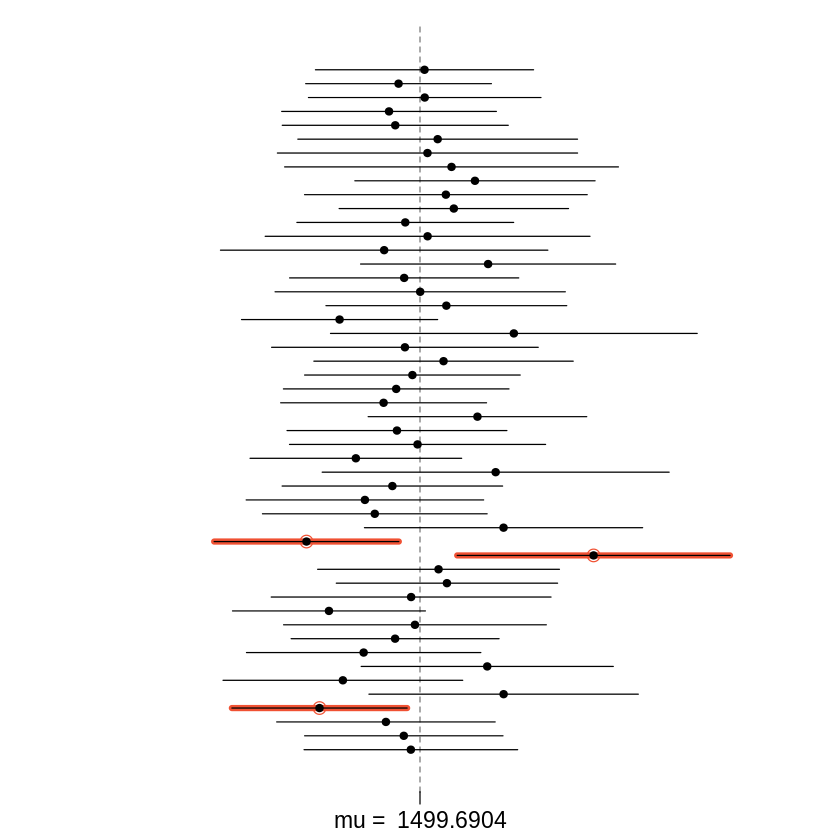

In [ ]:
# plot the results of all simulations using the function plot_ci
plot_ci(lower_vector, upper_vector, mean(population))

# Part 2: Analysis of Simulations (complete on you lab sheet)

1) Copy and paste the plot you just create into the lab sheet.
2) Describe what the plot shows. A complete explanation should include an summary of where each sample came from, the size of each sample, and what was measured in each sample (i.e., what each dot represents).
3) What proportion of your confidence intervals include the true population mean? Is this proportion exactly equal to the confidence level? If not, explain why.
